# Bombay Surface Temperature Forecasting

## About Dataset:


This dataset contains time series data of average surface temperatures of major cities worldwide from the year 1796 upto 2013.

## Objective:

The objective of this project is to analyse trends in Bombay's surface temperature data and build a forecasting model for the same.

## Cleaning the Data:

### Importing Common Data Handling & Processing Libraries:

In [1]:
import numpy as np
import pandas as pd

### Importing Data:

In [2]:
raw_data = pd.read_csv(r'..\data\GlobalLandTemperaturesByMajorCity.csv')
raw_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


### Extracting Chennai's Data:

In [3]:
ind_df=raw_data.loc[raw_data['Country']=='India']
ind_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
3943,1796-02-01,21.632,1.770,Ahmadabad,India,23.31N,72.52E
3944,1796-03-01,24.953,2.427,Ahmadabad,India,23.31N,72.52E
3945,1796-04-01,30.297,1.827,Ahmadabad,India,23.31N,72.52E
3946,1796-05-01,33.223,1.496,Ahmadabad,India,23.31N,72.52E
...,...,...,...,...,...,...,...
216560,2013-05-01,32.980,1.097,Surat,India,21.70N,73.56E
216561,2013-06-01,29.418,0.527,Surat,India,21.70N,73.56E
216562,2013-07-01,27.306,0.257,Surat,India,21.70N,73.56E
216563,2013-08-01,27.187,0.129,Surat,India,21.70N,73.56E


In [4]:
ind_df.City.unique()

array(['Ahmadabad', 'Bangalore', 'Bombay', 'Calcutta', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kanpur', 'Lakhnau', 'Madras', 'Nagpur',
       'New Delhi', 'Pune', 'Surat'], dtype=object)

In [5]:
df = raw_data[raw_data.City == 'Bombay']
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
30016,1796-01-01,24.317,2.190,Bombay,India,18.48N,72.68E
30017,1796-02-01,23.923,1.484,Bombay,India,18.48N,72.68E
30018,1796-03-01,24.407,2.309,Bombay,India,18.48N,72.68E
30019,1796-04-01,27.171,1.650,Bombay,India,18.48N,72.68E
30020,1796-05-01,29.050,1.290,Bombay,India,18.48N,72.68E


### Setting Date as Index:

In [6]:
data = df.copy()

In [7]:
data['Date'] = pd.to_datetime(data['dt'])

In [8]:
data.set_index(data['Date'], inplace = True)
data.index

DatetimeIndex(['1796-01-01', '1796-02-01', '1796-03-01', '1796-04-01',
               '1796-05-01', '1796-06-01', '1796-07-01', '1796-08-01',
               '1796-09-01', '1796-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=2613, freq=None)

In [9]:
data.index.freq='MS'

In [10]:
data.index

DatetimeIndex(['1796-01-01', '1796-02-01', '1796-03-01', '1796-04-01',
               '1796-05-01', '1796-06-01', '1796-07-01', '1796-08-01',
               '1796-09-01', '1796-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=2613, freq='MS')

In [11]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Date
Date,,,,,,,,
1796-01-01,1796-01-01,24.317,2.190,Bombay,India,18.48N,72.68E,1796-01-01
1796-02-01,1796-02-01,23.923,1.484,Bombay,India,18.48N,72.68E,1796-02-01
1796-03-01,1796-03-01,24.407,2.309,Bombay,India,18.48N,72.68E,1796-03-01
1796-04-01,1796-04-01,27.171,1.650,Bombay,India,18.48N,72.68E,1796-04-01
1796-05-01,1796-05-01,29.050,1.290,Bombay,India,18.48N,72.68E,1796-05-01


### Dropping Unnecessary Columns:

In [12]:
data = pd.DataFrame(data['AverageTemperature'])
data.head()

,AverageTemperature
Date,
1796-01-01,24.317
1796-02-01,23.923
1796-03-01,24.407
1796-04-01,27.171
1796-05-01,29.050


In [13]:
data.index

DatetimeIndex(['1796-01-01', '1796-02-01', '1796-03-01', '1796-04-01',
               '1796-05-01', '1796-06-01', '1796-07-01', '1796-08-01',
               '1796-09-01', '1796-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=2613, freq='MS')

### Extracting Reliable Data:
Prior to the 1970s, temperature readings were taken manually using mercury thermometers where any variation in the visit time impacted measurements. Therefore, we will only use data starting from the 1970s and disregard earlier data as it may not be reliable.

In [14]:
data = data['1970':'2012']
data.head()

,AverageTemperature
Date,
1970-01-01,24.599
1970-02-01,24.568
1970-03-01,25.658
1970-04-01,27.835
1970-05-01,29.348


### Checking for Null Values:

In [15]:
Total = data.isnull().sum().sort_values(ascending = False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
AverageTemperature,0,0.0


## Exploratory Data Analysis:

### Importing Data Visualization Libraries:

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising the Surface Temperature Data:

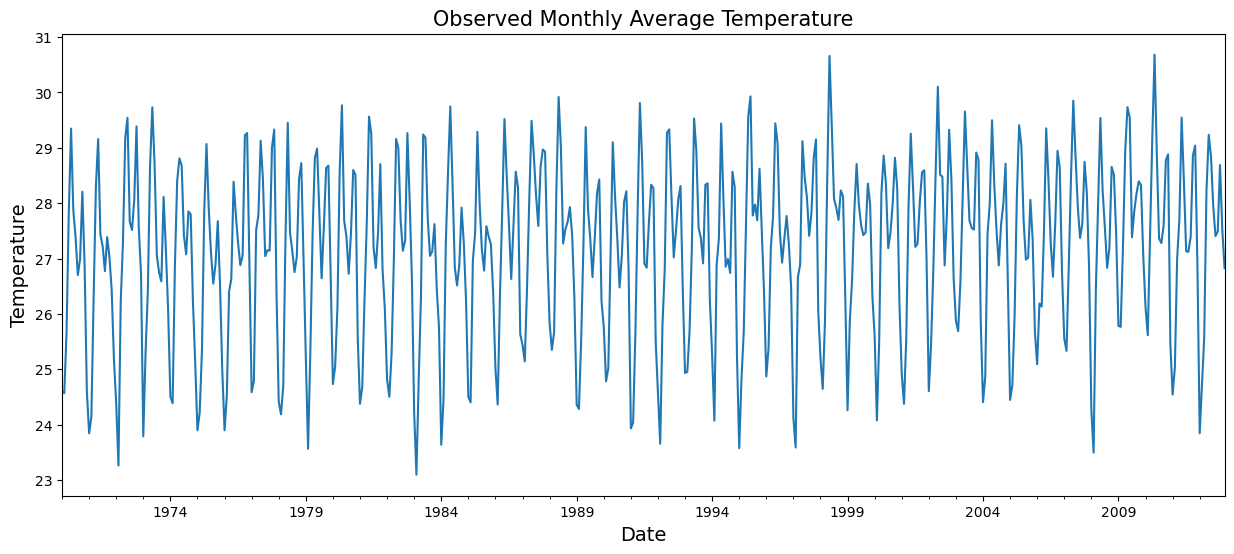

In [17]:
data.plot(figsize = (15, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Observed Monthly Average Temperature', fontsize = 15)
plt.show()

### Visualising Moving Averages of the Surface Temperatures:

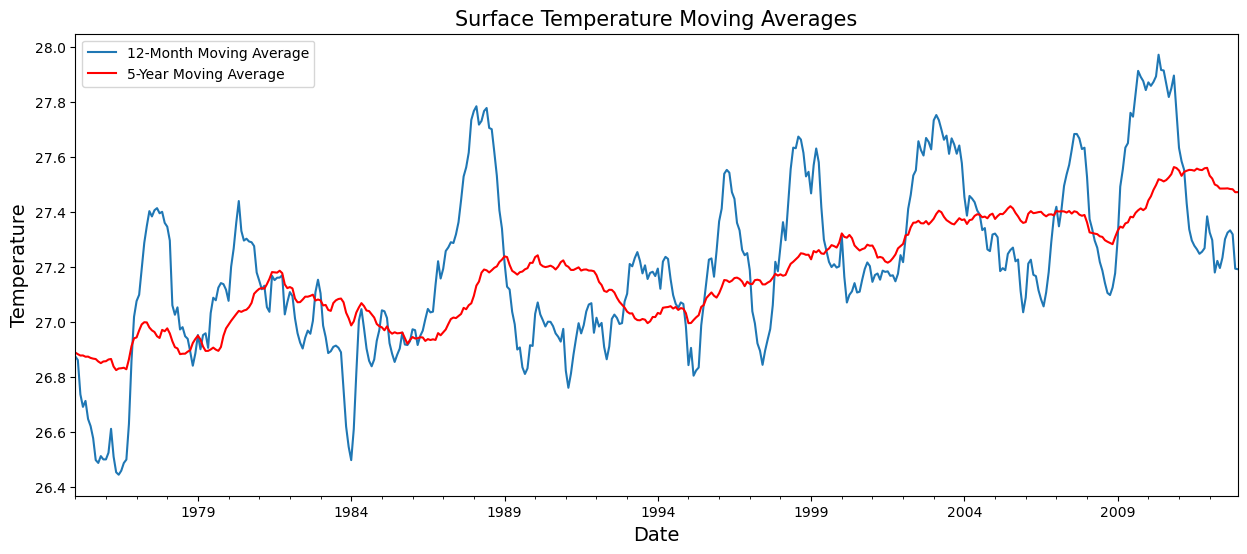

In [18]:
yearly = data['AverageTemperature'].rolling(window = 12).mean()
fiveyearly = data['AverageTemperature'].rolling(window = 60).mean()
MAax = yearly['1975':].plot(figsize = (15, 6), label = '12-Month Moving Average')
fiveyearly['1975':].plot(ax = MAax, color = 'red', label = '5-Year Moving Average')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Surface Temperature Moving Averages', fontsize = 15)
plt.legend()
plt.show()

### Seasonal Decomposition using Moving Averages:

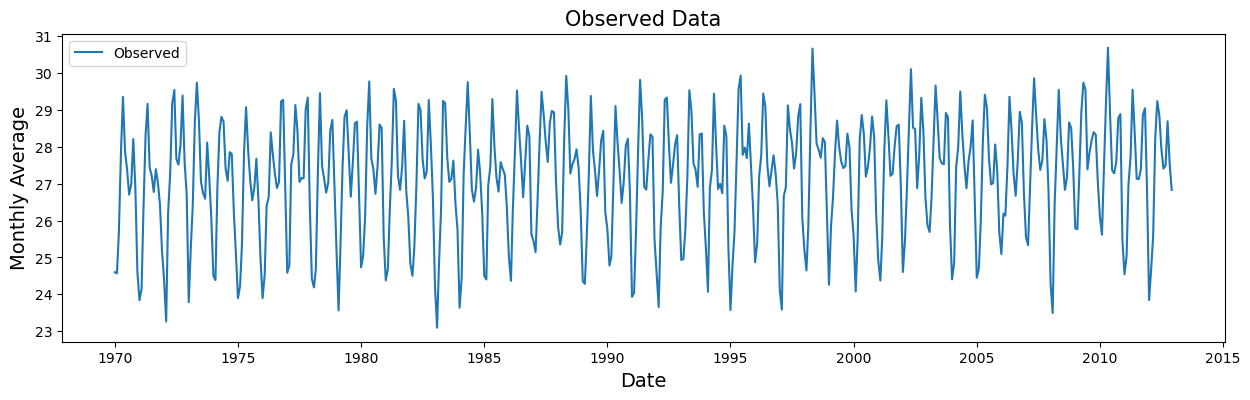

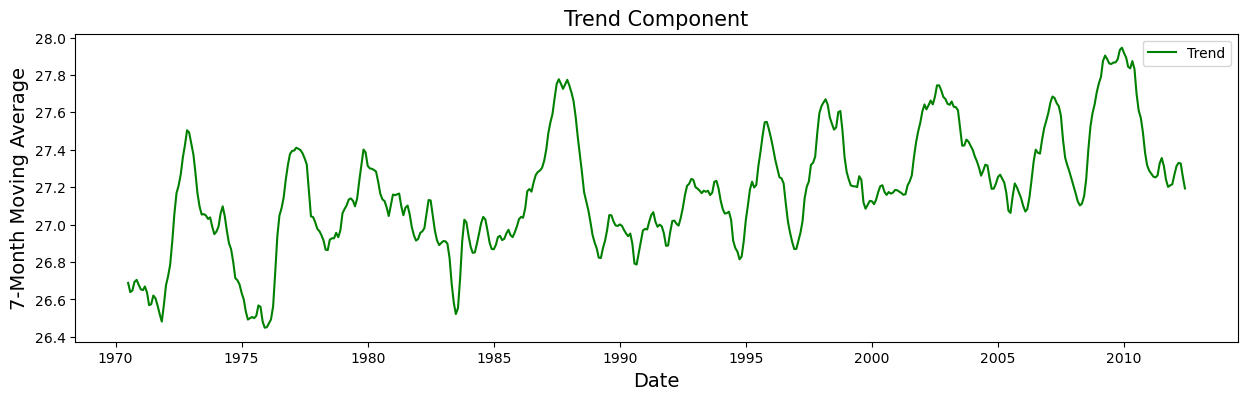

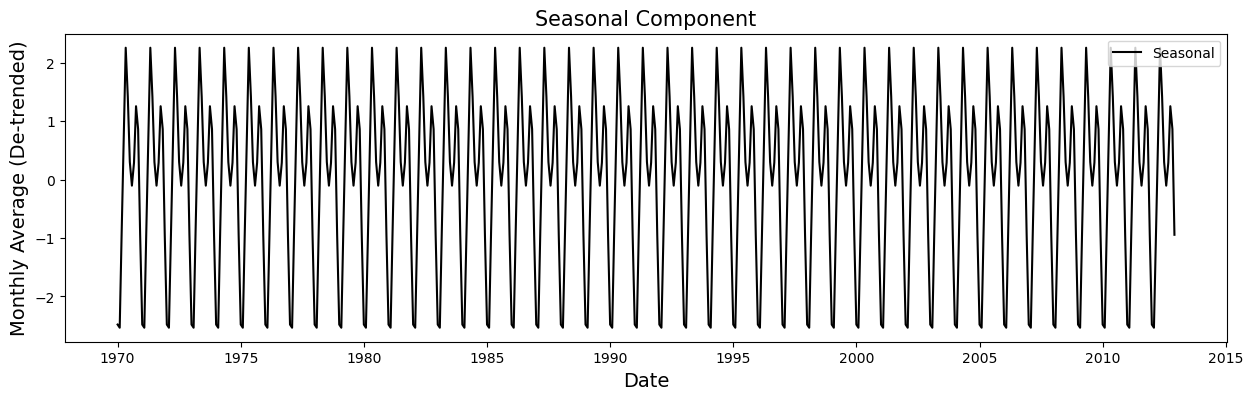

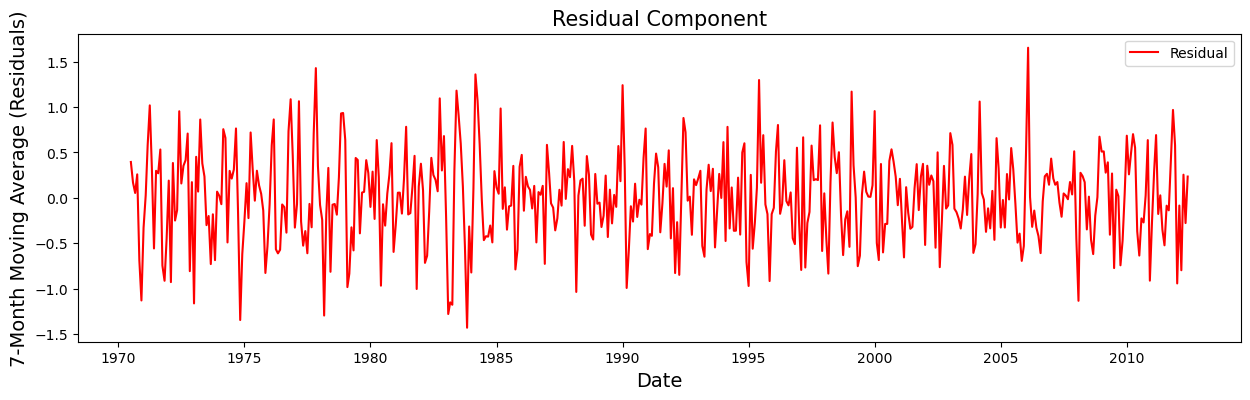

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Decomposing the time series:
decomposition = seasonal_decompose(data)

#Plotting the observed values:
observed = decomposition.observed
plt.figure(figsize = (15, 4))
plt.plot(observed, label = 'Observed')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Observed Data", fontsize = 15)
plt.show()

#Plotting the trend component:
trend = decomposition.trend
plt.figure(figsize = (15, 4))
plt.plot(trend, label = 'Trend', color = 'green')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Trend Component", fontsize = 15)
plt.show()

#Plotting the seasonal component:
seasonal = decomposition.seasonal
plt.figure(figsize = (15, 4))
plt.plot(seasonal, label = 'Seasonal', color = 'black')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average (De-trended)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Seasonal Component", fontsize = 15)
plt.show()

#Plotting the residual component:
residual = decomposition.resid
plt.figure(figsize = (15, 4))
plt.plot(residual, label = 'Residual', color = 'red')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average (Residuals)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Residual Component", fontsize = 15)
plt.show()

### Checking for Stationarity of Data:
A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. We need to ensure that the time series is stationary before using it to train a model.

#### Augmented Dickey-Fuller (ADF) Test:
* Augmented Dickey-Fuller (ADF) statistics is one of the more widely used statistical test to check whether the time series is stationary or non-stationary. 
* It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

**Null Hypothesis:** Series is not stationary.  
**Alternate Hypothesis:** Series is stationary.

In [20]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(result[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    
    print (result)
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
    
    
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                  -5.156647
p-value                          0.000011
No. of Lags Used                19.000000
Number of Observations Used    496.000000
dtype: float64
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


The p-value is lesser than the level of significance (0.05) and hence it is strong evidence against the null hypothesis and therefore we reject the null hypothesis. **This indicates that our time series data is stationary**.

#### KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

KPSS (Kwiatkowski-Philips-Schmidt-Shin) test is a statistical test to check for stationarity of a series around a deterministic trend.
KPSS  test figures out if a time series is stationary around a mean or linear trend or is non-stationary due to a unit root.

**Null Hypothesis:** The series is trend stationary.  
**Alternate Hypothesis:** The series is not stationary.

In [21]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression = 'c', nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index = ['Test Statistic','p-value','No. of Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test(data)

Results of KPSS Test:
Test Statistic            0.949196
p-value                   0.010000
No. of Lags Used         19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Ubaid Shah\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


The p-value is greater than the level of significance (0.05) and hence it is weak evidence against the null hypothesis and therefore we fail to reject the null hypothesis. **This indicates that our time series is stationary.**

**Both ADF and KPSS tests are in agreement that the time series data is stationary.**

## Pre-processing the Data:

### Assigning Frequency to the Time Series Data:

We resample the data with 'MS' (Month Start) as the frequency. Although the data already consisted of only monthly samples, resampling it this way assigns a frequency to it. Frequency ambiguity could lead to the SARIMAX model auto-assigning the frequency which should be avoided.

In [22]:
y = data['AverageTemperature']
y

Date
1970-01-01    24.599
1970-02-01    24.568
1970-03-01    25.658
1970-04-01    27.835
1970-05-01    29.348
               ...  
2012-08-01    27.405
2012-09-01    27.491
2012-10-01    28.689
2012-11-01    27.540
2012-12-01    26.828
Freq: MS, Name: AverageTemperature, Length: 516, dtype: float64

### Creating Train and Test Splits:

In [23]:
train = y[:'2009']
test = y['2010':]

## The Autoregressive Integrated Moving Average (ARIMA) Model:

Autoregressive Integrated Moving Average (ARIMA) is a model used in statistics and econometrics to measure events that happen over a period of time. The model is used to understand past data or predict future data in a series.

 - AR (Autoregression) : Model that shows a changing variable that regresses on its own lagged/prior values.
 - I (Integrated) : Differencing of raw observations to allow for the time series to become stationary
 - MA (Moving average) : Dependency between an observation and a residual error from a moving average model

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

 - p: the number of lag observations in the model; also known as the lag order.
 - d: the number of times that the raw observations are differenced; also known as the degree of differencing.
 - q: the size of the moving average window; also known as the order of the moving average.

## Seasonal Autoregressive Integrated Moving Average (SARIMA):

As we previously noticed, there's a seasonal component present in our data and therefore we'll be using Seasonal ARIMA.
Seasonal ARIMA is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

 - P: Seasonal autoregressive order.
 - D: Seasonal difference order.
 - Q: Seasonal moving average order.
 - m: The number of time steps for a single seasonal period.

## Building the SARIMAX Model:

### Using Auto-ARIMA to Find Optimal Values of the Hyperparameters:
The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model.

In [33]:
from pmdarima.arima import auto_arima

#The default values of several important parameters for auto_arima function are as follows:
#max_p=5, max_d=2, max_q=5, max_P=2, max_D=1, max_Q=2

arima_model = auto_arima(train, seasonal = True, m = 12,stationary=True, stepwise = False, trace = 1, random_state = 10)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1781.435, Time=0.16 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1483.807, Time=0.39 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1356.773, Time=1.38 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1128.179, Time=1.53 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1072.306, Time=2.25 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1095.668, Time=6.98 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=5.45 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=5.33 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=6.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1490.064, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1311.368, Time=0.45 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1208.149, Time=1.88 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1062.893, Time=1.63 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=971.579, Time=2.66 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1010.349, Time=7.10 sec
 ARIMA(0,0,

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders

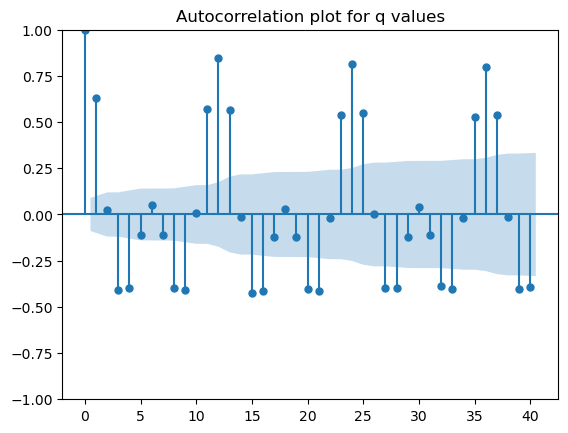

In [25]:
title = 'Autocorrelation plot for q values'
lags = 40
plot_acf(train,title=title,lags=lags);

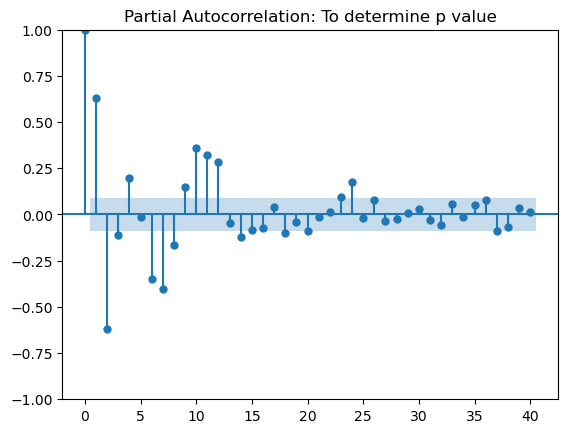

In [26]:
title = 'Partial Autocorrelation: To determine p value'
lags = 40
plot_pacf(train,title=title,lags=lags,method='ywm');

## ARMA and ARIMA Models

In [27]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
# from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

In [28]:
model = ARIMA(train,order=(0,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     AverageTemperature   No. Observations:                  480
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -686.311
Date:                Tue, 04 Jul 2023   AIC                           1380.622
Time:                        10:52:28   BIC                           1397.317
Sample:                    01-01-1970   HQIC                          1387.185
                         - 12-01-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1447      0.115    236.288      0.000      26.920      27.370
ma.L1          0.9444      0.044     21.664      0.000       0.859       1.030
ma.L2          0.4999      0.040     12.493      0.000       0.421       0.578
sigma2         1.0197      0.074     13.788      0.000       0.875       1.165
===================================================================================
Ljung-Box (L1) (Q):                   2.79   Jarque-Bera (JB):                 4.26
Prob(Q):                              0.09   Prob(JB):                         0.12
Heteroskedasticity (H):               0.84   Skew:                            -0.11
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

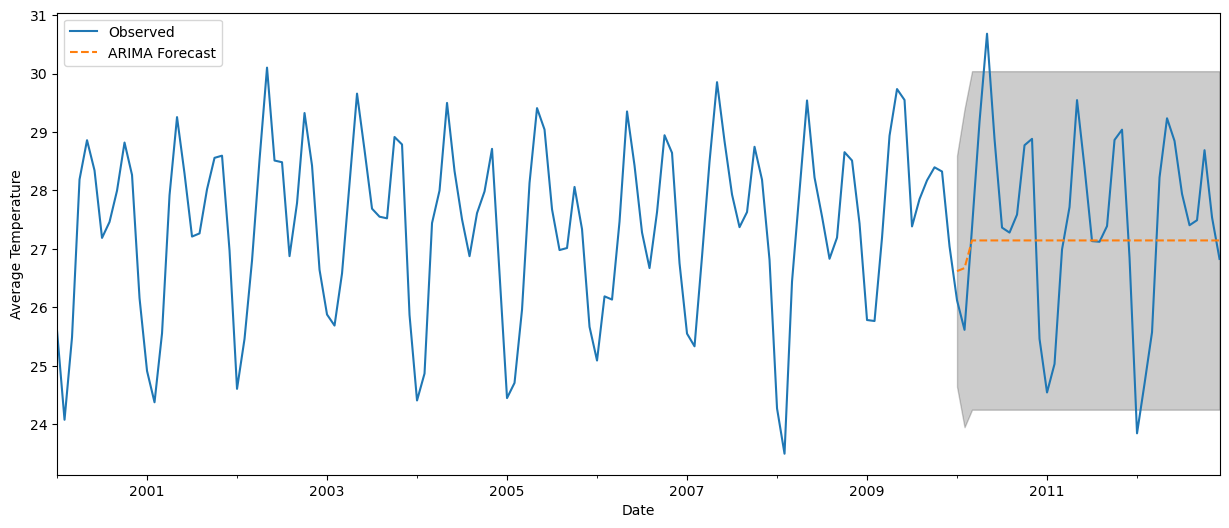

In [29]:
#Getting the ARIMA forecast with number of steps as 36 since we want to make 3 year prediction and our data is monthly sampled.
pred = results.get_forecast(steps = 36)
#Plotting the observed and forecasted values:
ax1 = y['2000':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax1, label = 'ARIMA Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc = 'upper left')
plt.show()

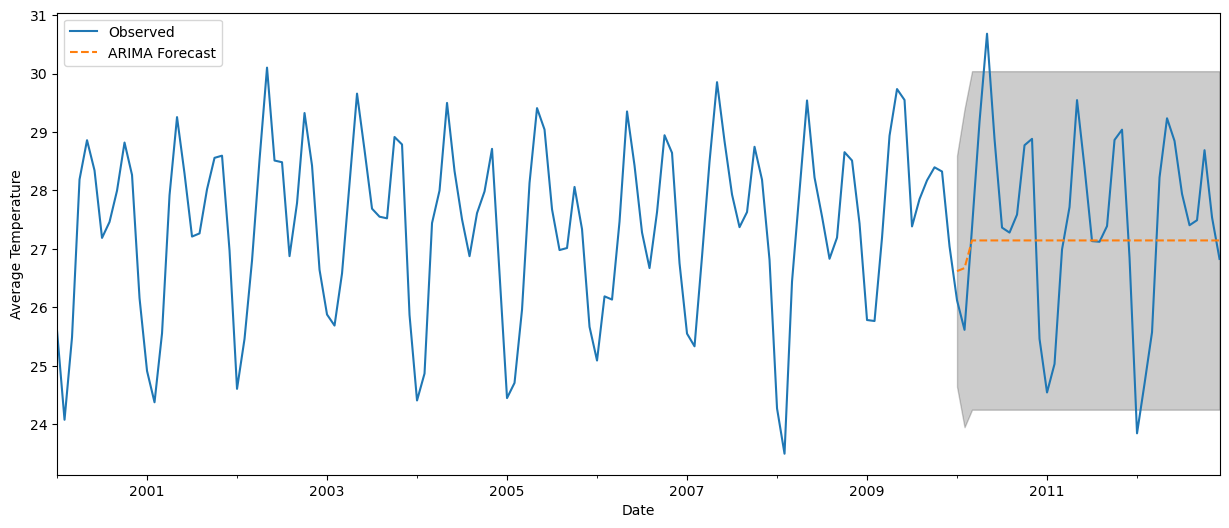

In [30]:
ax1 = y['2000':].plot(label = 'Observed')
pred.predicted_mean.plot(label = 'ARIMA Forecast', figsize = (15, 6), linestyle = 'dashed')
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc = 'upper left')
plt.show();

### Training the SARIMAX Model:
Now we train the SARIMAX model using the optimal values of the hyperparameters that we found using auto-ARIMA.

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
model1=SARIMAX(train, order = (1, 1, 2), seasonal_order = (1, 0, 1, 12), 
                                  enforce_stationarity = False, enforce_invertibility = False)
fitted_model = model1.fit(maxiter = 200)
print(fitted_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                  480
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -383.351
Date:                              Tue, 04 Jul 2023   AIC                            778.702
Time:                                      10:53:02   BIC                            803.541
Sample:                                  01-01-1970   HQIC                           788.480
                                       - 12-01-2009                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4805      0.106      4.545      0.000       0.273       0.688
ma.L1         -1.11

### Plotting Diagnostics of the Data:
Diagnostic plots for standardized residuals of the surface temperatures.  

The plot_diagnostics function produces a 2x2 plot grid with the following plots (ordered clockwise from top left):
* Standardized residuals over time
* Histogram plus estimated density of standardized residuals, along with a Normal(0,1) density plotted for reference.
* Normal Q-Q plot, with Normal reference line.
* Correlogram

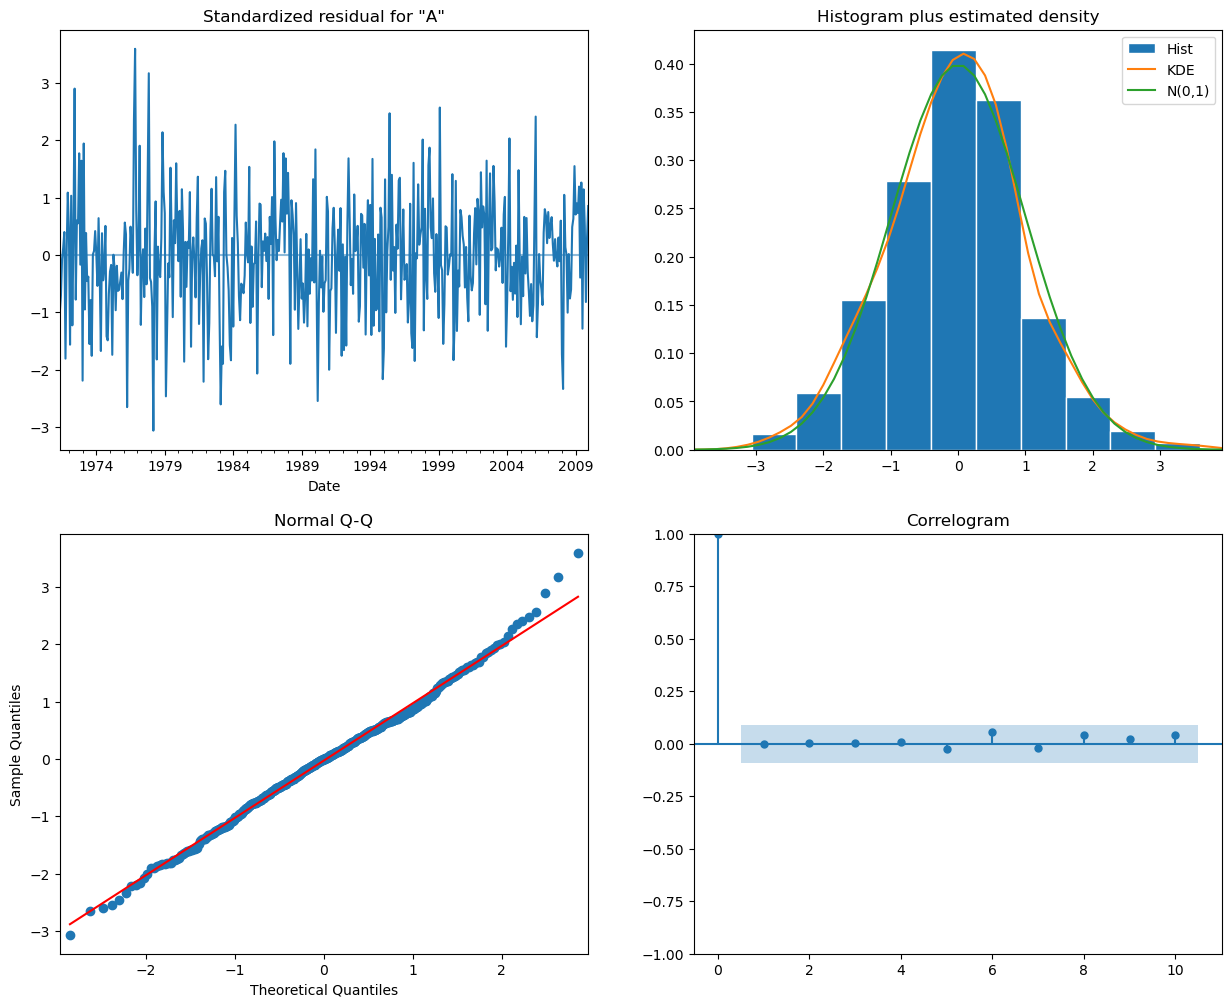

In [34]:
fitted_model.plot_diagnostics(figsize = (15, 12))
plt.show()

**As seen through the histogram and the Normal Q-Q, the residuals are normally distributed and the correlogram confirms that there's insignificant autocorrelation present in the residuals.**

## SARIMAX Forecasting:

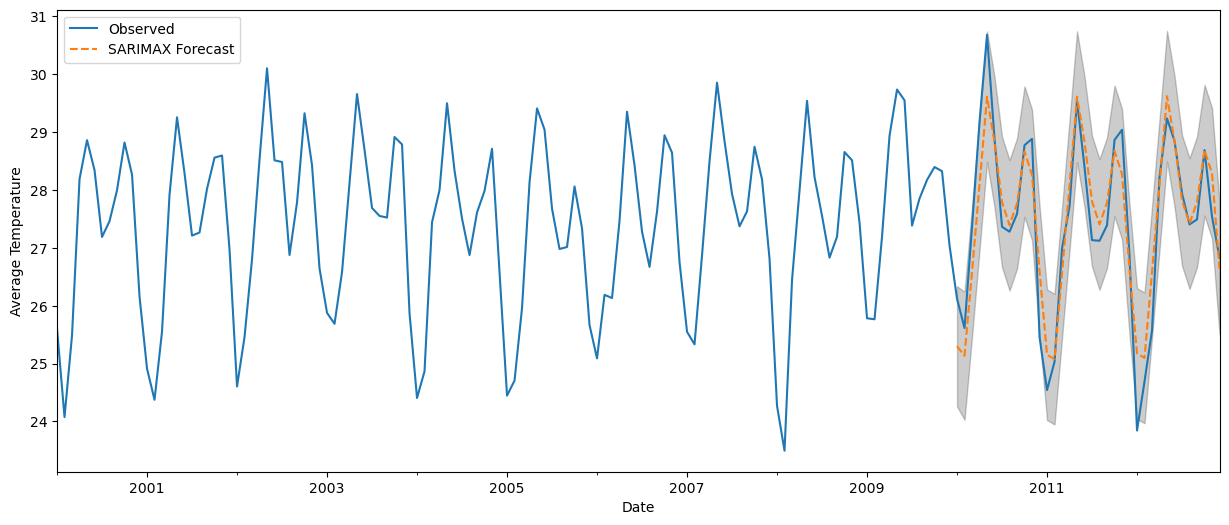

In [35]:
#Getting the SARIMAX forecast with number of steps as 36 since we want to make 3 year prediction and our data is monthly sampled.
pred = fitted_model.get_forecast(steps = 36)
#Plotting the observed and forecasted values:
ax1 = y['2000':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax1, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc = 'upper left')
plt.show()

### Zooming In on the Forecast:

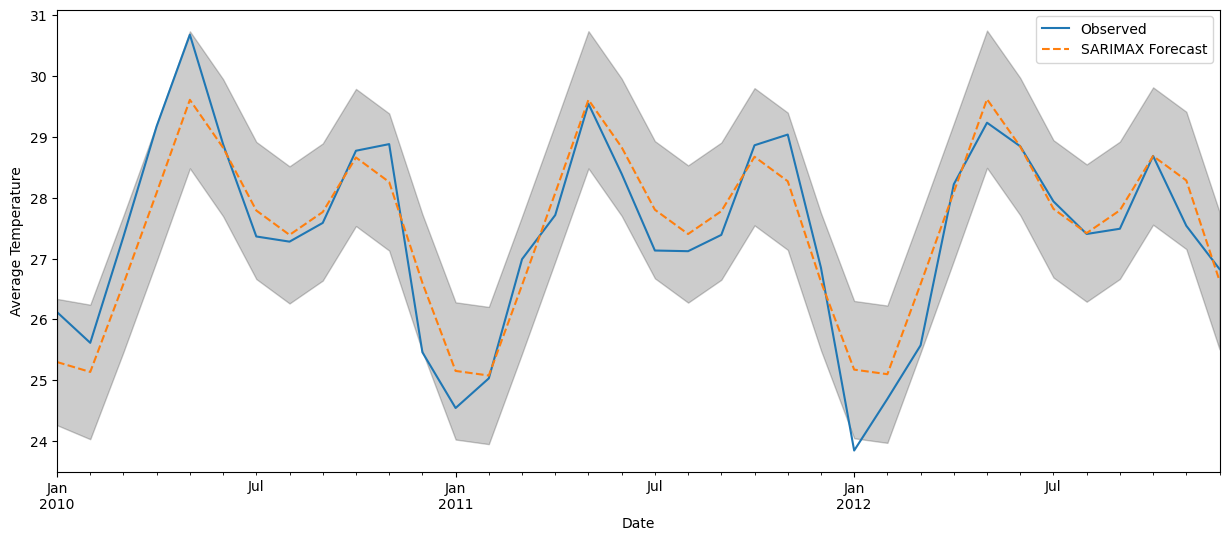

In [36]:
#Plotting the observed and forecasted values:
ax2 = y['2010':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax2, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax2.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Temperature')
plt.legend()
plt.show()

## Evaluating the SARIMAX Model:

In [37]:
y_forecasted_SARIMAX = pred.predicted_mean
y_truth = test
mse_SARIMAX = ((y_forecasted_SARIMAX - y_truth) ** 2).mean()
print('The Mean Squared Error of SARIMAX forecast is {}'.format(round(mse_SARIMAX, 2)))
print('The Root Mean Squared Error of SARIMAX forecast is {}'.format(round(np.sqrt(mse_SARIMAX), 2)))

The Mean Squared Error of SARIMAX forecast is 0.33
The Root Mean Squared Error of SARIMAX forecast is 0.57


In [38]:
model2 = SARIMAX(train, order = (0, 0, 2), seasonal_order = (1, 0, 1, 12), 
                                  enforce_stationarity = False, enforce_invertibility = False)
fitted_model2 = model2.fit(maxiter = 200)
print(fitted_model2.summary())

                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                  480
Model:             SARIMAX(0, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -387.829
Date:                              Tue, 04 Jul 2023   AIC                            785.657
Time:                                      10:53:34   BIC                            806.367
Sample:                                  01-01-1970   HQIC                           793.809
                                       - 12-01-2009                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1       -133.4960      1.635    -81.670      0.000    -136.700    -130.292
ma.L2        -42.55

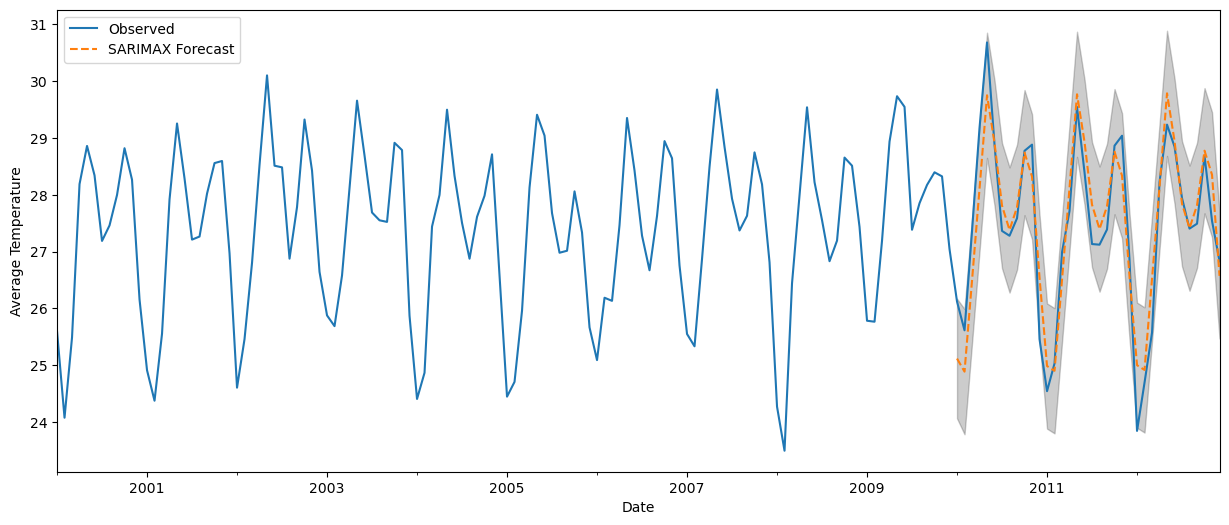

In [39]:
#Getting the SARIMAX forecast with number of steps as 36 since we want to make 3 year prediction and our data is monthly sampled.
pred2 = fitted_model2.get_forecast(steps = 36)
#Plotting the observed and forecasted values:
ax1 = y['2000':].plot(label = 'Observed')
pred2.predicted_mean.plot(ax = ax1, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci2 = pred2.conf_int()
ax1.fill_between(pred_ci2.index, pred_ci2.iloc[:, 0], pred_ci2.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc = 'upper left')
plt.show()

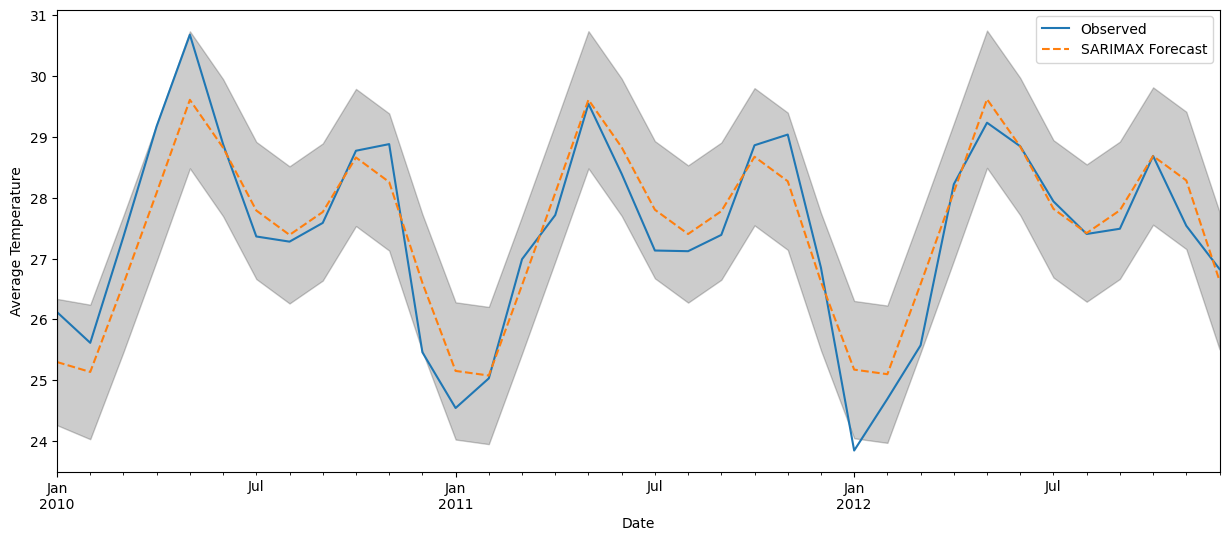

In [41]:
#Plotting the observed and forecasted values:
ax2 = y['2010':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax2, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax2.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Temperature')
plt.legend()
plt.show()

In [42]:
y_forecasted_SARIMAX2 = pred2.predicted_mean
y_truth2 = test
mse_SARIMAX = ((y_forecasted_SARIMAX2 - y_truth2) ** 2).mean()
print('The Mean Squared Error of SARIMAX forecast is {}'.format(round(mse_SARIMAX, 2)))
print('The Root Mean Squared Error of SARIMAX forecast is {}'.format(round(np.sqrt(mse_SARIMAX), 2)))

The Mean Squared Error of SARIMAX forecast is 0.33
The Root Mean Squared Error of SARIMAX forecast is 0.57


**The RMSE tells us that the SARIMAX model was able to forecast the monthly average temperature within 0.58°C of the true temperature.**

## The Long Short Term Memory (LSTM) Model:
Long Short Term Memory Network is an advanced Recurrent Neural Network (RNN), a sequential network, that allows information to persist over long sequences of data. Essentially, LSTMs are capable of remembering previous information from long data sequences and use it for processing the current input.  
A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.  
![LSTM3-chain.png](attachment:LSTM3-chain.png)  
LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series.

## Additional Data Pre-processing:

### Scaling the Data:

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1))

### Re-structuring the Time Series Data for LSTM usage:
For the LSTM to use the time series data, we first need to split it into rolling windows of a specific size. We can do this easily using the TimeseriesGenerator function in the Keras library.

In [43]:
from keras.preprocessing.sequence import TimeseriesGenerator

window_size = 60

train_generator = TimeseriesGenerator(train_scaled, 
                                      train_scaled, 
                                      length = window_size, 
                                      batch_size = 1)

### Understanding Rolling Windows:

Let's say we have a time series data like this : **\[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 \]**  
If we decide that our window size is 3 (i.e., we will use the previous three data points to make the next prediction), then our data needs to be re-structured in the following way:  
* **\[ 1, 2, 3 \] : \[ 4 \]**  
* **\[ 2, 3, 4 \] : \[ 5 \]**
* **\[ 3, 4, 5 \] : \[ 6 \]**
* **\[ 4, 5, 6 \] : \[ 7 \]**
* **\[ 5, 6, 7 \] : \[ 8 \]**
* **\[ 6, 7, 8 \] : \[ 9 \]**  
* **\[ 7, 8, 9 \] : \[ 10 \]**

The window sizes are expected to be multiples of the number of time steps in a single seasonal period. This allows the LSTM to effectively learn the periodic nature of these values.

In [44]:
## Building the LSTM Model:

### Defining the Sequential Model:
In our sequential model, we will be using 3 LSTMs and 2 Dense layers with a final output Dense layer.

In [45]:
import tensorflow as tf

model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(100, input_shape = (window_size, 1), return_sequences = True),
        tf.keras.layers.LSTM(50, return_sequences = True),
        tf.keras.layers.LSTM(10),
        tf.keras.layers.Dense(64, activation ='relu'),
        tf.keras.layers.Dense(32, activation ='relu'),
        tf.keras.layers.Dense(1)
])

### Compiling the Model:
We will use the Mean Squared Error (MSE) to calculate the loss and use the Adam optimizer.  
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In [46]:
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 76,257
Trainable params: 76,257
Non-traina

**We have a total of 76,257 trainable parameters. This is not a computationally expensive model and therefore training time should be low.**

### Creating ModelCheckpoint Callback:
This callback ensures that only the best model (lowest loss) gets saved.

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(r"C:\Users\Ubaid Shah\Downloads\TimeSerAna\Chennai-Surface-Temperature-Forecasting-master\Chennai-Surface-Temperature-Forecasting-master\models\TemperatureForecastingModel.h5", 
                             monitor = 'loss', save_best_only = True)

In [49]:
#Setting random seeds for python, numpy and tensorflow to ensure repeatable resultsb.
import random as rd
rd.seed(10)
np.random.seed(150)
tf.random.set_seed(150)

history = model.fit(train_generator, epochs = 10, callbacks = [checkpoint])

Epoch 1/10
420/420 [==============================] - 66s 136ms/step - loss: 0.1501
Epoch 2/10
420/420 [==============================] - 47s 112ms/step - loss: 0.1535
Epoch 3/10
420/420 [==============================] - 63s 150ms/step - loss: 0.1546
Epoch 4/10
420/420 [==============================] - 31s 73ms/step - loss: 0.1455
Epoch 5/10
420/420 [==============================] - 57s 136ms/step - loss: 0.1548
Epoch 6/10
420/420 [==============================] - 76s 180ms/step - loss: 0.1523
Epoch 7/10
420/420 [==============================] - 55s 132ms/step - loss: 0.1495
Epoch 8/10
420/420 [==============================] - 61s 145ms/step - loss: 0.1488
Epoch 9/10
420/420 [==============================] - 55s 130ms/step - loss: 0.1404
Epoch 10/10
420/420 [==============================] - 64s 151ms/step - loss: 0.1375


### Plotting the Training Loss:

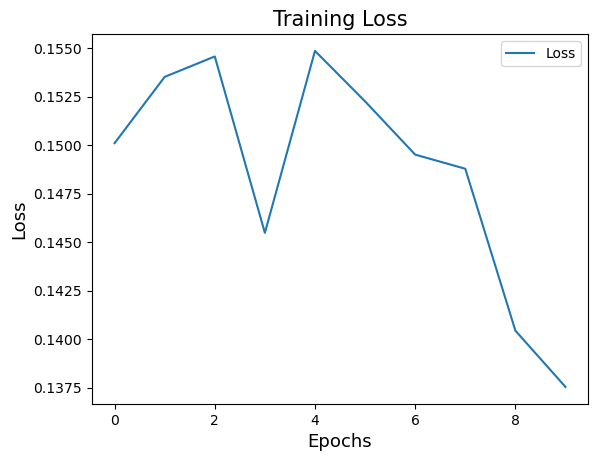

In [51]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs", fontsize = 13)
plt.ylabel("Loss", fontsize = 13)
plt.legend(["Loss"])
plt.title("Training Loss", fontsize = 15)
plt.show()

**From the graph, we can see that there is a significant drop in loss over 100 epochs.**

In [52]:
from tensorflow.keras.models import load_model
model = load_model(r"C:\Users\Ubaid Shah\Downloads\TimeSerAna\Chennai-Surface-Temperature-Forecasting-master\Chennai-Surface-Temperature-Forecasting-master\models\TemperatureForecastingModel.h5")

In [53]:
#Creating an empty forecasts list:
lstm_predictions_scaled = []

#Creating a batch of the latest data points based on the window size for forecast:
batch = train_scaled[-window_size:]
#Reshaping the batch as per model requirements:
current_batch = batch.reshape((1, window_size, 1))

#Iteratively making the forecast for each month of the next year:
for i in range(len(test)):
    #Forecasting the next month using previous 14 (window size) data points.
    lstm_pred = model.predict(current_batch)[0]
    #Appending the next month forecast to the forecasts list:
    lstm_predictions_scaled.append(lstm_pred) 
    #Appending the next month forecast to the current batch and 
    #removing the earliest data point in its place to preserve the window size:
    current_batch = np.append(current_batch[:, 1:, :], [[lstm_pred]], axis = 1)
    
#Since the original values were scaled before training the model, we need to 
#inverse scale the forecast in order to get the forecast for the original data. 
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

1/1 [==============================] - 0s 63ms/step


### Plotting the LSTM Forecast:

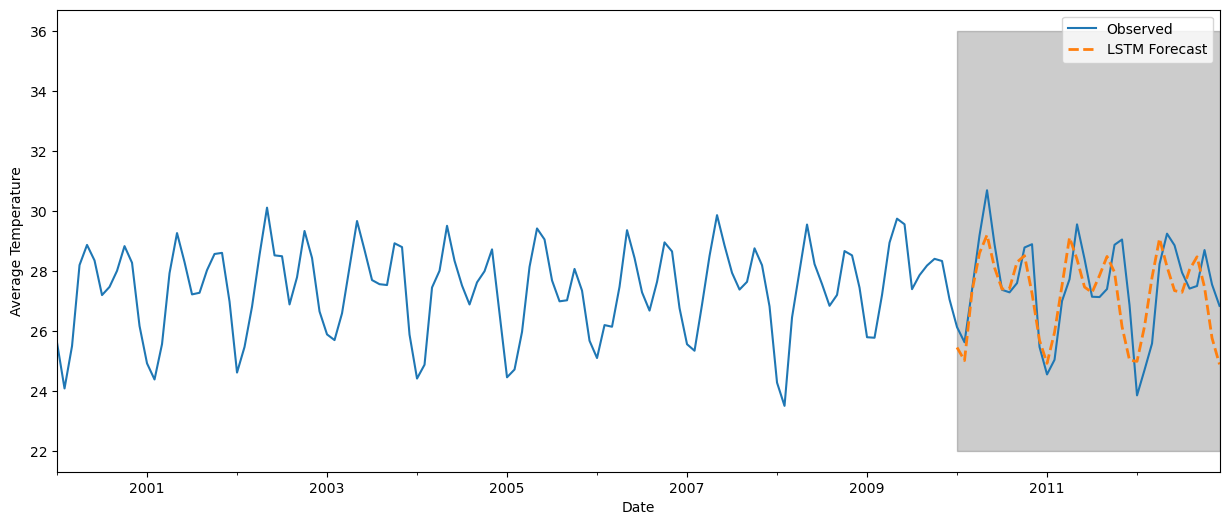

In [54]:
lstm_preds = pd.DataFrame(data = [lstm_predictions[i][0] for i in range(0, len(lstm_predictions))], columns = ['LSTM Forecast']).set_index(test.index)
ax3 = y['2000':].plot(label = 'Observed')
ax3.fill_between(y['2010':].index, [22 for i in y['2010':]], [36 for i in y['2010':]], color = 'k', alpha = 0.2)
lstm_preds.plot(ax = ax3, label = 'LSTM Forecast', figsize = (15, 6), linewidth = 2, linestyle = 'dashed')
ax3.set_xlabel('Date')
ax3.set_ylabel('Average Temperature')
plt.legend()
plt.show()

## Evaluating the LSTM Model:

In [55]:
y_forecasted_LSTM = lstm_preds['LSTM Forecast']
y_truth = test
mse_LSTM = ((y_forecasted_LSTM - y_truth) ** 2).mean()
print('The Mean Squared Error of LSTM forecast is {}'.format(round(mse_LSTM, 2)))
print('The Root Mean Squared Error of LSTM forecast is {}'.format(round(np.sqrt(mse_LSTM), 2)))

The Mean Squared Error of LSTM forecast is 1.38
The Root Mean Squared Error of LSTM forecast is 1.18


## Comparing SARIMAX and LSTM Forecasts:

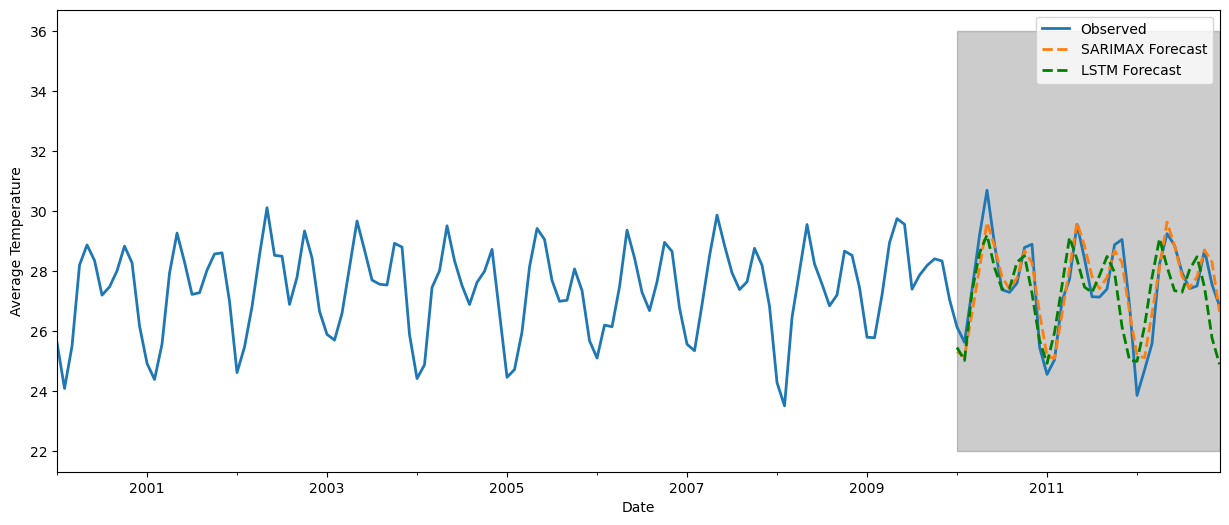

In [56]:
plt.figure(figsize = (15, 6))
ax5 = y['2000':].plot(label = 'Observed', linewidth = 2)
ax5.fill_between(y['2010':].index, [22 for i in y['2010':]], [36 for i in y['2010':]], color = 'k', alpha = 0.2)
pred.predicted_mean.plot(ax = ax5, label = 'SARIMAX Forecast', linewidth = 2, linestyle = 'dashed')
lstm_preds.plot(ax = ax5, label = 'LSTM Forecast', linewidth = 2, linestyle = 'dashed', color = 'green')
ax5.set_xlabel('Date')
ax5.set_ylabel('Average Temperature')
plt.legend()
plt.show()

In [57]:
print("The SARIMAX Model had an RMSE value of {} whereas the LSTM model had an RMSE value of {}.".format(round(np.sqrt(mse_SARIMAX), 2), round(np.sqrt(mse_LSTM), 2)))

The SARIMAX Model had an RMSE value of 0.57 whereas the LSTM model had an RMSE value of 1.18.


**A properly hyperparameter tuned SARIMAX model is able to marginally outperform an LSTM-based sequential deep learning model for the given time series data.**